# Klasifikasi Heart Disease menggunakan Support Vector Machine (SVM)

**Dataset**: Heart Disease Dataset dari Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

**Tujuan**: Memprediksi apakah seseorang memiliki penyakit jantung berdasarkan berbagai fitur medis.


## Import Libraries

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Create output directory
import os
output_dir = '../REPORTS/OUTPUT'
os.makedirs(output_dir, exist_ok=True)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Dataset

Dataset Heart Disease berisi informasi medis pasien untuk memprediksi penyakit jantung.

In [245]:
# Load dataset
df = pd.read_csv('../DATA/heart.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (1025, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Understanding

Memahami struktur dan karakteristik dataset.

In [246]:
# Dataset information
print("Dataset Information:")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("\nStatistik Deskriptif:")
print("=" * 50)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Statistik Deskriptif:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [247]:
# Check missing values
print("Missing Values:")
print("=" * 50)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

# Check duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Target distribution
print("\nTarget Distribution:")
print("=" * 50)
print(df['target'].value_counts())
print(f"\nPercentage:")
print(df['target'].value_counts(normalize=True) * 100)

Missing Values:
No missing values found!

Duplicate rows: 723

Target Distribution:
target
1    526
0    499
Name: count, dtype: int64

Percentage:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


## Exploratory Data Analysis (EDA)

Analisis visual untuk memahami pola dalam data.

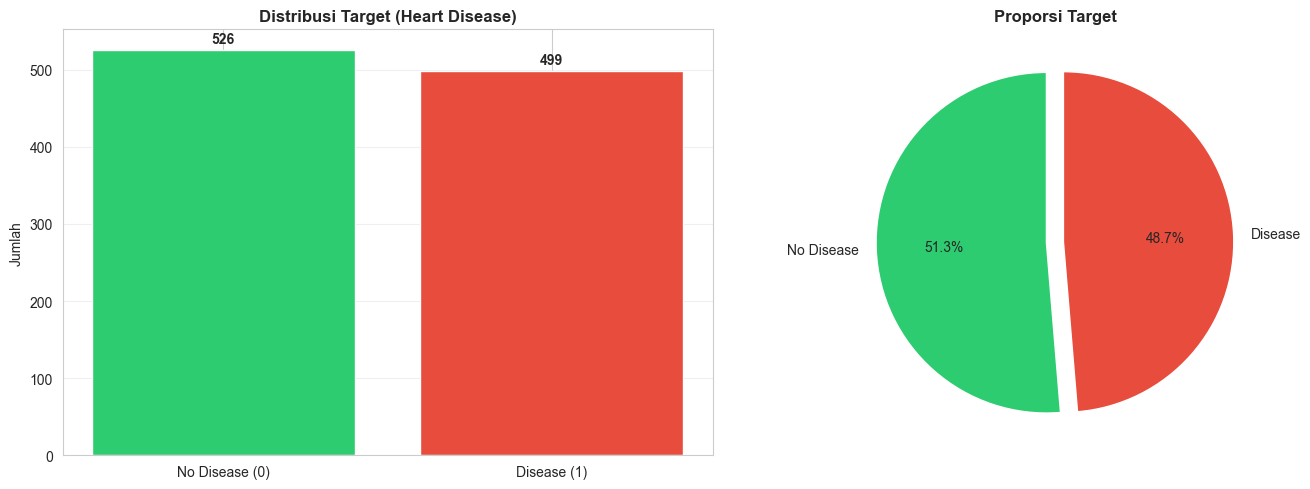

Gambar distribusi target disimpan!


In [248]:
# Target distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df['target'].value_counts()
ax[0].bar(['No Disease (0)', 'Disease (1)'], target_counts.values, color=['#2ecc71', '#e74c3c'])
ax[0].set_ylabel('Jumlah')
ax[0].set_title('Distribusi Target (Heart Disease)', fontweight='bold', fontsize=12)
ax[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(target_counts.values):
    ax[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
ax[1].pie(target_counts.values, labels=['No Disease', 'Disease'], autopct='%1.1f%%',
          colors=colors, startangle=90, explode=(0.05, 0.05))
ax[1].set_title('Proporsi Target', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(f'{output_dir}/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gambar distribusi target disimpan!")

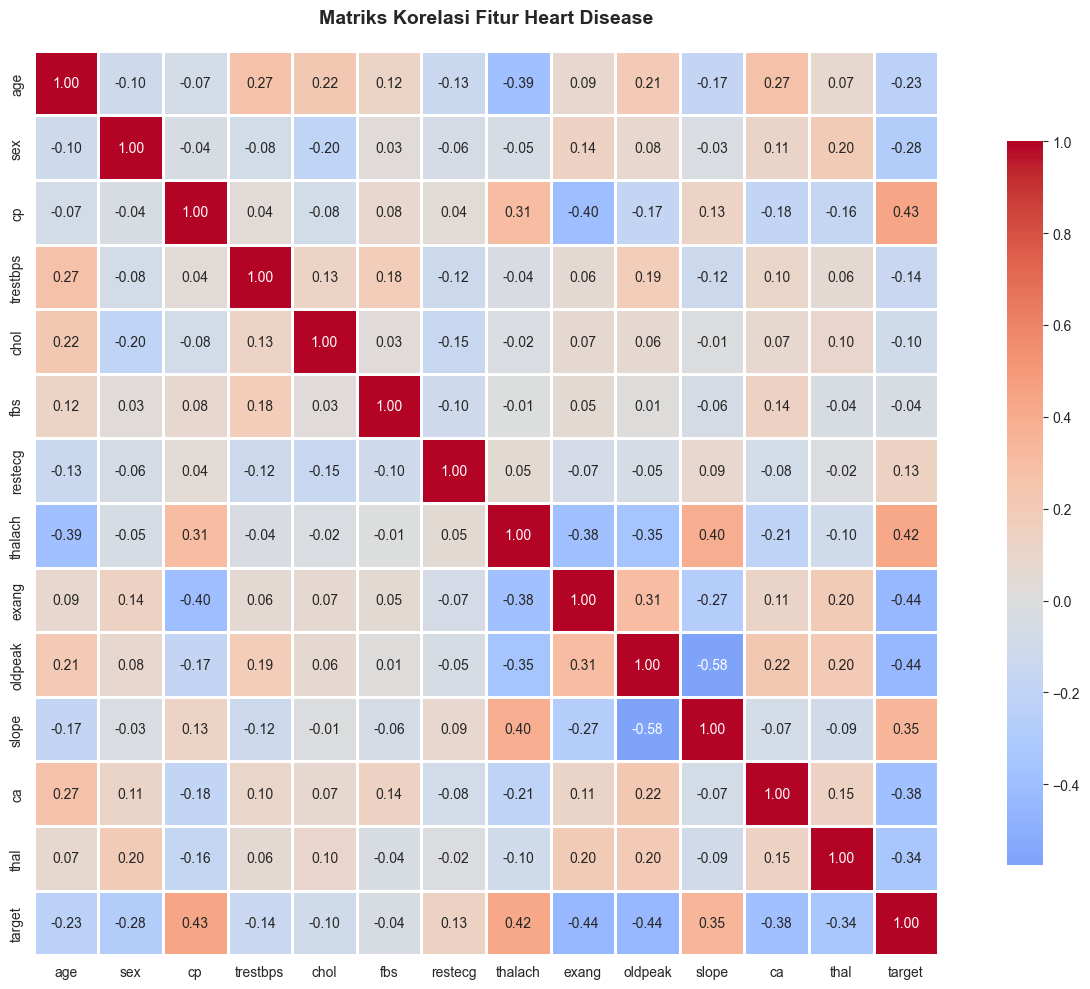

Gambar matriks korelasi disimpan!


In [249]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriks Korelasi Fitur Heart Disease', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f'{output_dir}/02_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gambar matriks korelasi disimpan!")

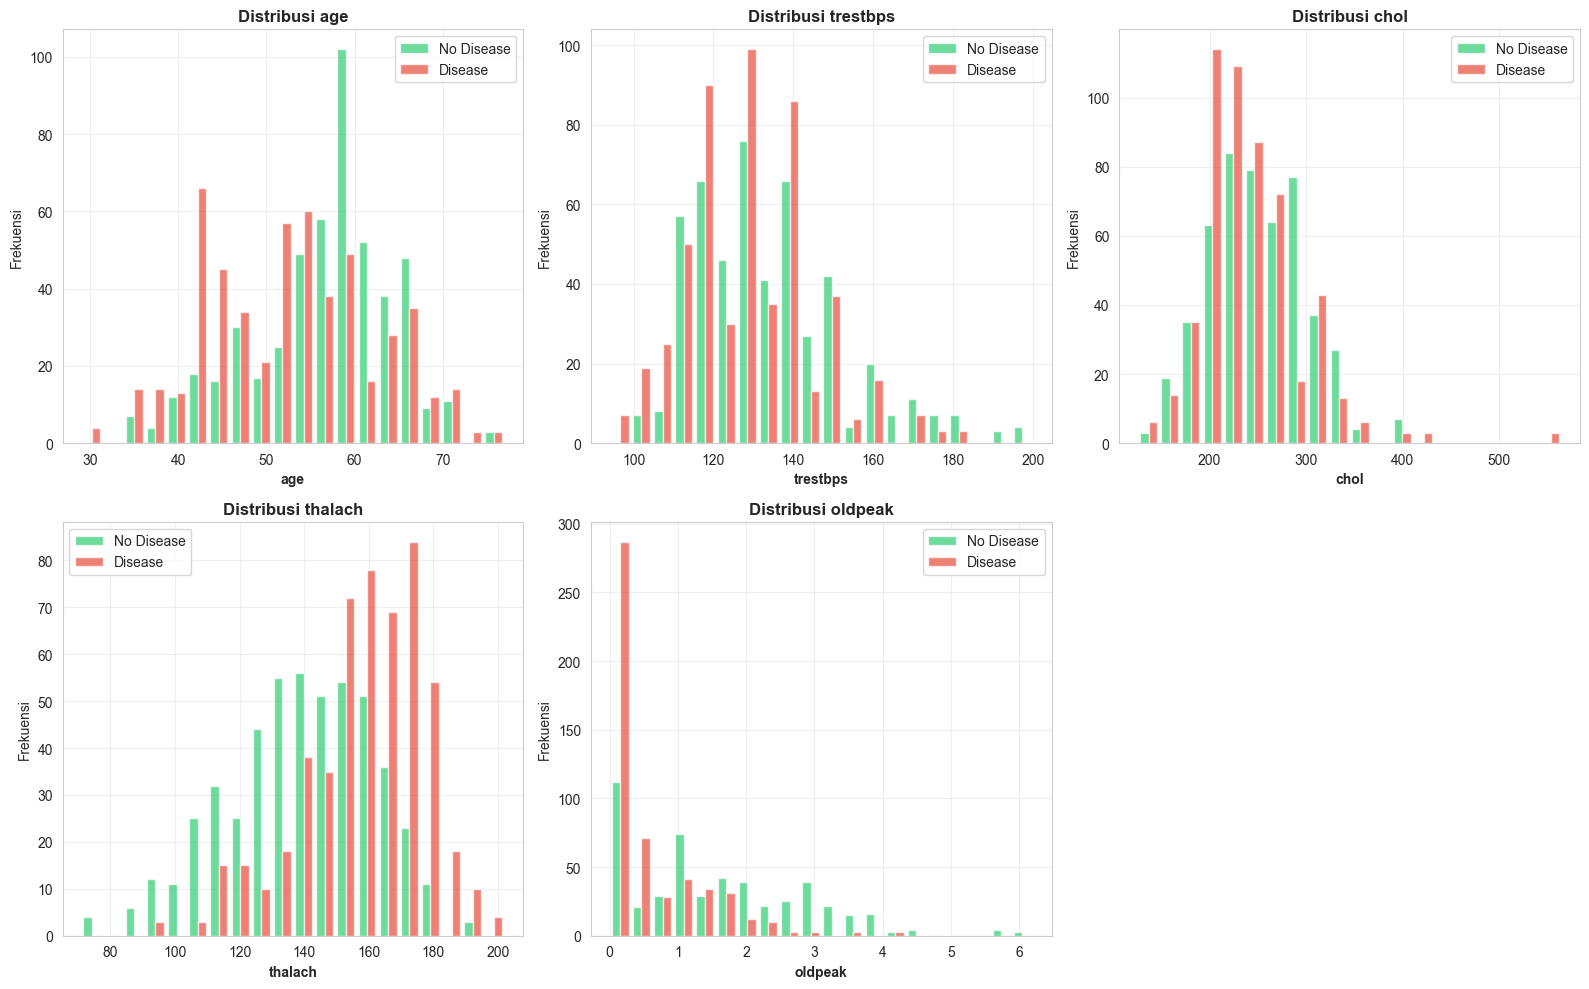

Gambar distribusi fitur disimpan!


In [250]:
# Feature distribution by target
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist([df[df['target']==0][col], df[df['target']==1][col]], 
                   label=['No Disease', 'Disease'], bins=20, alpha=0.7, color=['#2ecc71', '#e74c3c'])
    axes[idx].set_xlabel(col, fontweight='bold')
    axes[idx].set_ylabel('Frekuensi')
    axes[idx].set_title(f'Distribusi {col}', fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig(f'{output_dir}/03_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gambar distribusi fitur disimpan!")

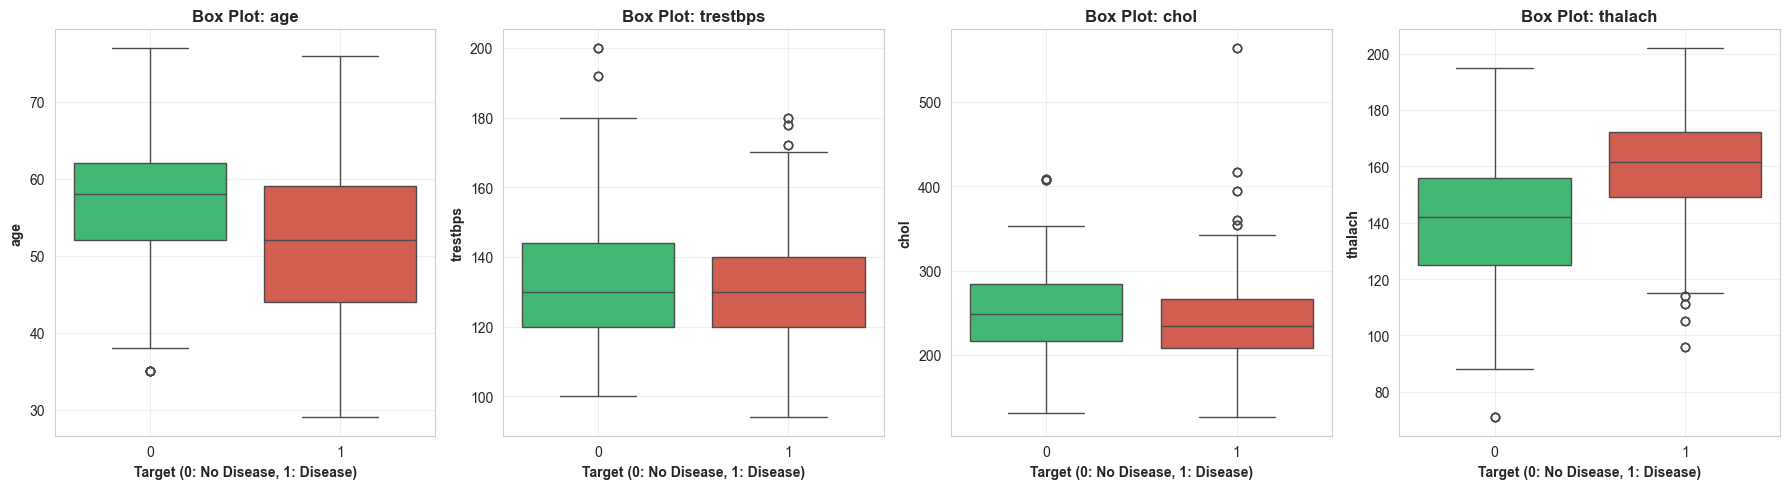

Gambar box plots disimpan!


In [251]:
# Box plots for key features
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

key_features = ['age', 'trestbps', 'chol', 'thalach']
for idx, col in enumerate(key_features):
    sns.boxplot(x='target', y=col, data=df, ax=axes[idx], palette=['#2ecc71', '#e74c3c'])
    axes[idx].set_xlabel('Target (0: No Disease, 1: Disease)', fontweight='bold')
    axes[idx].set_ylabel(col, fontweight='bold')
    axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/04_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gambar box plots disimpan!")

## Data Preprocessing

Persiapan data untuk modeling.

In [252]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

Features shape: (1025, 13)
Target shape: (1025,)

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


## Split Data

Membagi data menjadi training set (80%) dan testing set (20%).

In [253]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split completed!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"\nTesting set target distribution:")
print(y_test.value_counts())

Data split completed!
Training set: 820 samples
Testing set: 205 samples

Training set target distribution:
target
1    421
0    399
Name: count, dtype: int64

Testing set target distribution:
target
1    105
0    100
Name: count, dtype: int64


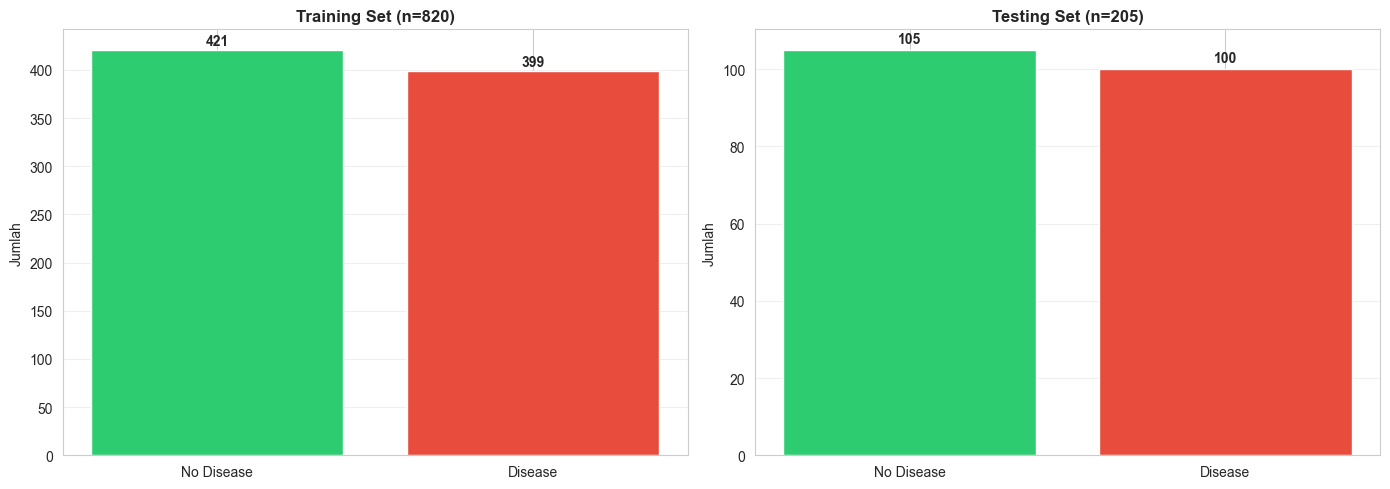

Gambar pembagian data disimpan!


In [254]:
# Visualize train-test split
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
train_counts = y_train.value_counts()
axes[0].bar(['No Disease', 'Disease'], train_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Jumlah')
axes[0].set_title(f'Training Set (n={len(y_train)})', fontweight='bold', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(train_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Testing set
test_counts = y_test.value_counts()
axes[1].bar(['No Disease', 'Disease'], test_counts.values, color=['#2ecc71', '#e74c3c'])
axes[1].set_ylabel('Jumlah')
axes[1].set_title(f'Testing Set (n={len(y_test)})', fontweight='bold', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_counts.values):
    axes[1].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_dir}/05_train_test_split.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gambar pembagian data disimpan!")

## Feature Scaling

SVM sensitif terhadap skala fitur, sehingga perlu normalisasi.

In [255]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"\nBefore scaling - Training set statistics:")
print(f"Mean: {X_train.mean().mean():.2f}")
print(f"Std: {X_train.std().mean():.2f}")
print(f"\nAfter scaling - Training set statistics:")
print(f"Mean: {X_train_scaled.mean():.2f}")
print(f"Std: {X_train_scaled.std():.2f}")

Feature scaling completed!

Before scaling - Training set statistics:
Mean: 45.57
Std: 8.26

After scaling - Training set statistics:
Mean: -0.00
Std: 1.00


## Model Training - Baseline SVM

Melatih model SVM dengan parameter default.

In [256]:
# Train baseline SVM with RBF kernel
svm_baseline = SVC(kernel='rbf', random_state=42)
svm_baseline.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = svm_baseline.predict(X_train_scaled)
y_test_pred = svm_baseline.predict(X_test_scaled)

# Evaluation
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Baseline SVM Model (RBF Kernel) - Results:")
print("=" * 50)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"\nNumber of support vectors: {len(svm_baseline.support_vectors_)}")

Baseline SVM Model (RBF Kernel) - Results:
Training Accuracy: 0.9561 (95.61%)
Testing Accuracy: 0.9268 (92.68%)

Number of support vectors: 333


## Hyperparameter Tuning

Mencari parameter optimal menggunakan Grid Search.

In [257]:
# Grid search for best parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

print("Starting Grid Search...")
print(f"Testing {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['kernel'])} combinations")

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("\nGrid Search completed!")
print("\nBest Parameters:")
print("=" * 50)
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest CV Score: {grid_search.best_score_:.4f}")

Starting Grid Search...
Testing 72 combinations
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Grid Search completed!

Best Parameters:
C: 0.1
gamma: 1
kernel: poly

Best CV Score: 0.9817


## Model Training - Optimized SVM

Melatih model SVM dengan parameter optimal.

In [258]:
# Train optimized model
svm_optimized = grid_search.best_estimator_

# Predictions
y_train_pred_opt = svm_optimized.predict(X_train_scaled)
y_test_pred_opt = svm_optimized.predict(X_test_scaled)

# Evaluation
train_acc_opt = accuracy_score(y_train, y_train_pred_opt)
test_acc_opt = accuracy_score(y_test, y_test_pred_opt)
test_precision = precision_score(y_test, y_test_pred_opt)
test_recall = recall_score(y_test, y_test_pred_opt)
test_f1 = f1_score(y_test, y_test_pred_opt)

print("Optimized SVM Model - Results:")
print("=" * 50)
print(f"Training Accuracy: {train_acc_opt:.4f} ({train_acc_opt*100:.2f}%)")
print(f"Testing Accuracy: {test_acc_opt:.4f} ({test_acc_opt*100:.2f}%)")
print(f"Testing Precision: {test_precision:.4f}")
print(f"Testing Recall: {test_recall:.4f}")
print(f"Testing F1-Score: {test_f1:.4f}")
print(f"\nNumber of support vectors: {len(svm_optimized.support_vectors_)}")

Optimized SVM Model - Results:
Training Accuracy: 1.0000 (100.00%)
Testing Accuracy: 1.0000 (100.00%)
Testing Precision: 1.0000
Testing Recall: 1.0000
Testing F1-Score: 1.0000

Number of support vectors: 180


## Model Comparison

Membandingkan performa model baseline dan optimized.


Model Comparison:
        Model  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1-Score
 Baseline SVM        0.956098       0.926829        0.916667     0.942857       0.929577
Optimized SVM        1.000000       1.000000        1.000000     1.000000       1.000000


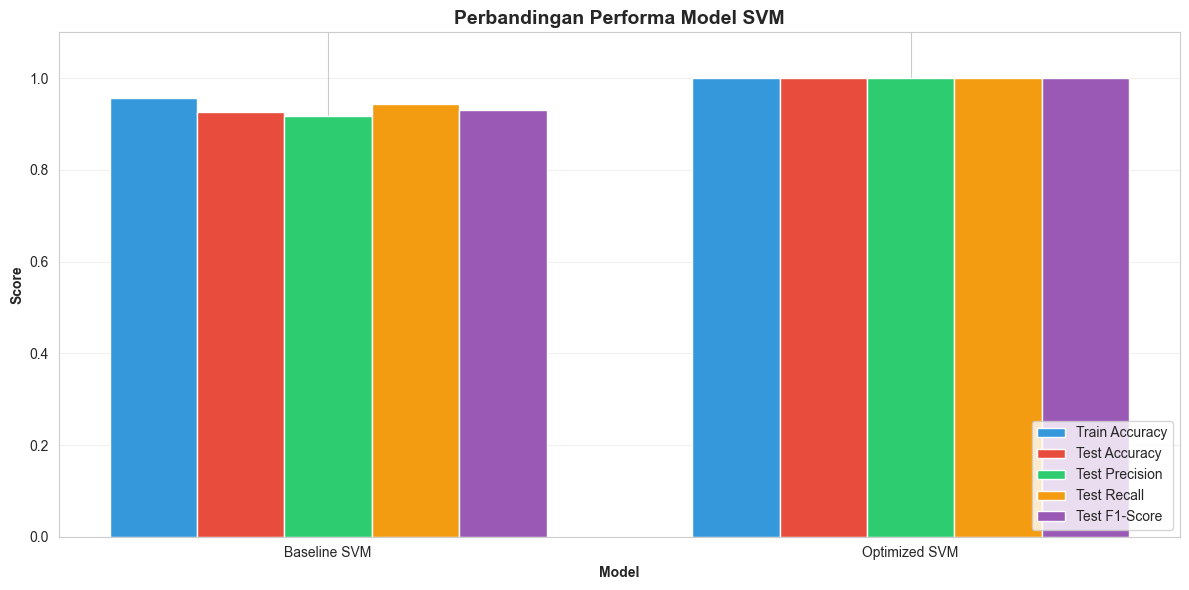


Gambar perbandingan model disimpan!


In [259]:
# Model comparison
comparison_data = {
    'Model': ['Baseline SVM', 'Optimized SVM'],
    'Train Accuracy': [train_acc, train_acc_opt],
    'Test Accuracy': [test_acc, test_acc_opt],
    'Test Precision': [
        precision_score(y_test, y_test_pred),
        test_precision
    ],
    'Test Recall': [
        recall_score(y_test, y_test_pred),
        test_recall
    ],
    'Test F1-Score': [
        f1_score(y_test, y_test_pred),
        test_f1
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print("=" * 80)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_data['Model']))
width = 0.15
metrics = ['Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, comparison_data[metric], width, label=metric, color=colors[i])

ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Perbandingan Performa Model SVM', fontweight='bold', fontsize=14)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(comparison_data['Model'])
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig(f'{output_dir}/06_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGambar perbandingan model disimpan!")

## Confusion Matrix

Analisis detail prediksi model.

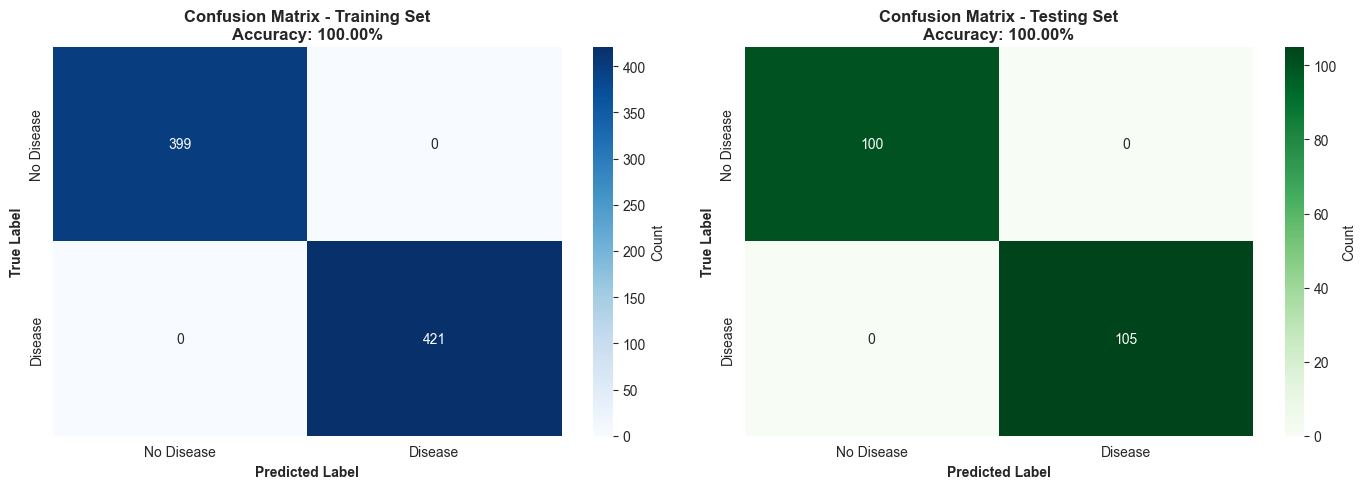

Gambar confusion matrix disimpan!


In [260]:
# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred_opt)
cm_test = confusion_matrix(y_test, y_test_pred_opt)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set confusion matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontweight='bold')
axes[0].set_ylabel('True Label', fontweight='bold')
axes[0].set_title(f'Confusion Matrix - Training Set\nAccuracy: {train_acc_opt:.2%}',
                  fontweight='bold', fontsize=12)

# Testing set confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            cbar_kws={'label': 'Count'})
axes[1].set_xlabel('Predicted Label', fontweight='bold')
axes[1].set_ylabel('True Label', fontweight='bold')
axes[1].set_title(f'Confusion Matrix - Testing Set\nAccuracy: {test_acc_opt:.2%}',
                  fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(f'{output_dir}/07_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gambar confusion matrix disimpan!")

## Classification Report

Laporan detail metrik klasifikasi.

In [261]:
# Classification report
print("Classification Report - Training Set:")
print("=" * 60)
print(classification_report(y_train, y_train_pred_opt,
                          target_names=['No Disease', 'Disease']))

print("\nClassification Report - Testing Set:")
print("=" * 60)
print(classification_report(y_test, y_test_pred_opt,
                          target_names=['No Disease', 'Disease']))

Classification Report - Training Set:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       399
     Disease       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820


Classification Report - Testing Set:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       100
     Disease       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## ROC Curve dan AUC Score

Evaluasi kemampuan model dalam membedakan kelas.

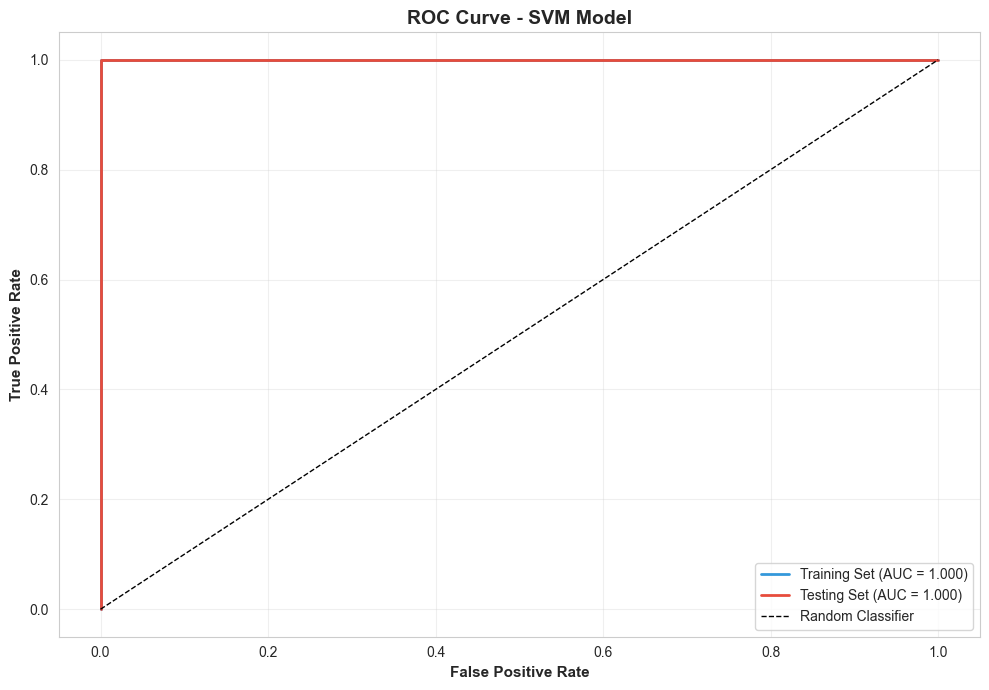

Training AUC: 1.0000
Testing AUC: 1.0000

Gambar ROC curve disimpan!


In [262]:
# Get probability predictions
y_train_proba = svm_optimized.decision_function(X_train_scaled)
y_test_proba = svm_optimized.decision_function(X_test_scaled)

# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC
auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc_train:.3f})',
         linewidth=2, color='#3498db')
plt.plot(fpr_test, tpr_test, label=f'Testing Set (AUC = {auc_test:.3f})',
         linewidth=2, color='#e74c3c')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=11)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=11)
plt.title('ROC Curve - SVM Model', fontweight='bold', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f'{output_dir}/08_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Training AUC: {auc_train:.4f}")
print(f"Testing AUC: {auc_test:.4f}")
print("\nGambar ROC curve disimpan!")

## Cross-Validation

Evaluasi stabilitas model menggunakan 5-fold cross-validation.

5-Fold Cross-Validation Results:
Fold 1: 0.9512 (95.12%)
Fold 2: 1.0000 (100.00%)
Fold 3: 0.9817 (98.17%)
Fold 4: 0.9756 (97.56%)
Fold 5: 1.0000 (100.00%)
Mean CV Score: 0.9817 (98.17%)
Std CV Score: 0.0181


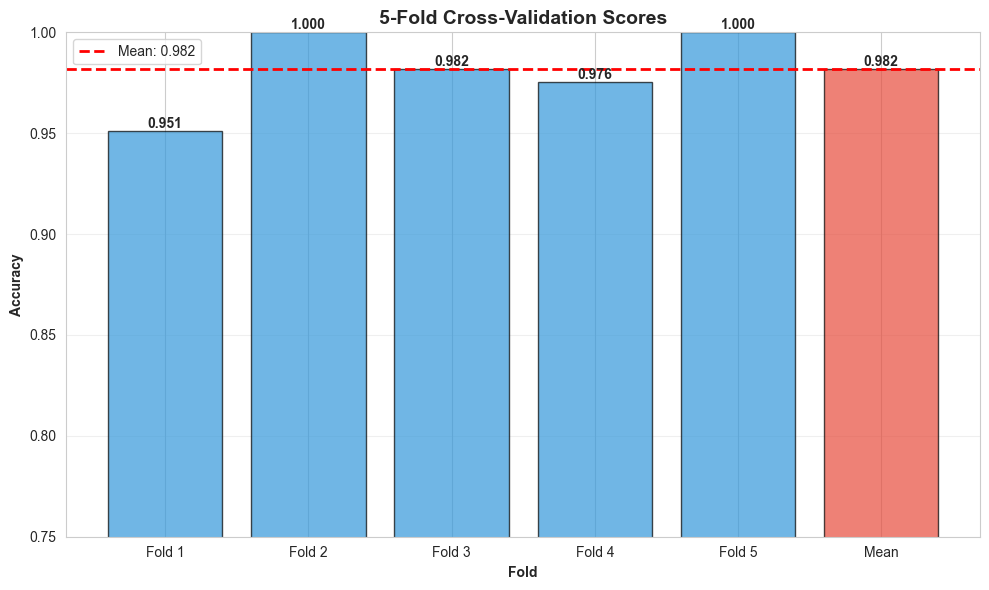


Gambar cross-validation disimpan!


In [263]:
# Cross-validation
cv_scores = cross_val_score(svm_optimized, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("5-Fold Cross-Validation Results:")
print("=" * 50)
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f} ({score*100:.2f}%)")
print("=" * 50)
print(f"Mean CV Score: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Std CV Score: {cv_scores.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 6))
folds = [f'Fold {i}' for i in range(1, 6)] + ['Mean']
scores = list(cv_scores) + [cv_scores.mean()]
colors = ['#3498db'] * 5 + ['#e74c3c']

bars = plt.bar(folds, scores, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean():.3f}')
plt.xlabel('Fold', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('5-Fold Cross-Validation Scores', fontweight='bold', fontsize=14)
plt.ylim([0.75, 1.0])
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_dir}/09_cross_validation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGambar cross-validation disimpan!")

## Kernel Comparison

Membandingkan performa berbagai kernel SVM.

Comparing SVM Kernels:
LINEAR - Train: 0.8610, Test: 0.8146
RBF - Train: 0.9561, Test: 0.9268
POLY - Train: 0.9415, Test: 0.9268
SIGMOID - Train: 0.7683, Test: 0.7463


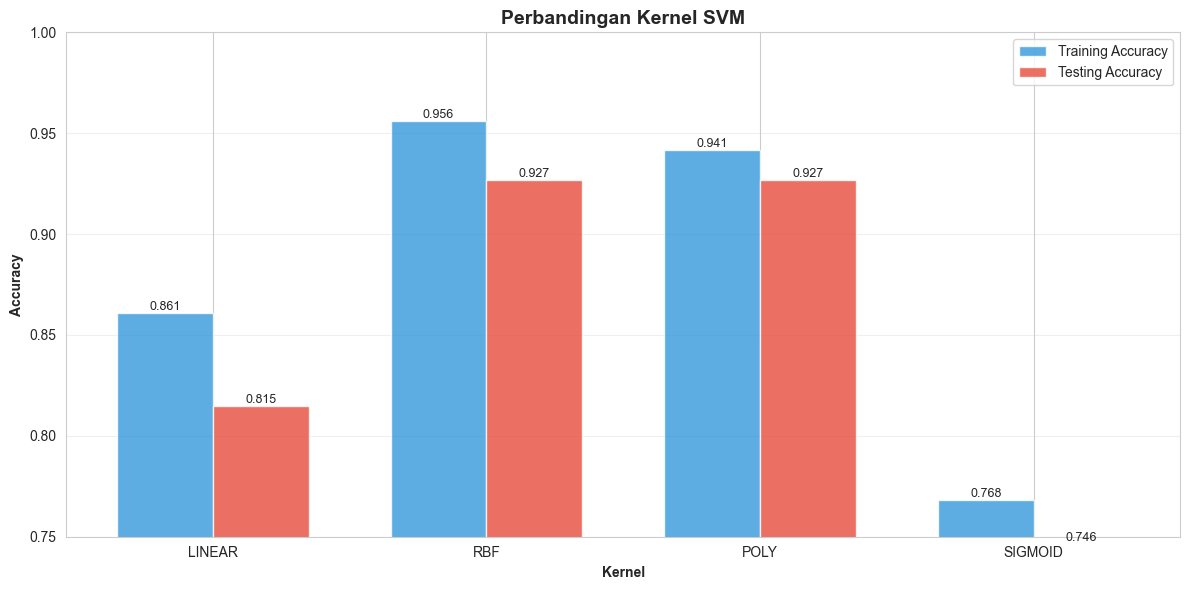


Gambar perbandingan kernel disimpan!


In [264]:
# Compare different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_results = []

print("Comparing SVM Kernels:")
print("=" * 50)

for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    
    train_score = svm_model.score(X_train_scaled, y_train)
    test_score = svm_model.score(X_test_scaled, y_test)
    
    kernel_results.append({
        'Kernel': kernel,
        'Train Accuracy': train_score,
        'Test Accuracy': test_score
    })
    
    print(f"{kernel.upper()} - Train: {train_score:.4f}, Test: {test_score:.4f}")

kernel_df = pd.DataFrame(kernel_results)

# Visualize kernel comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(kernels))
width = 0.35

bars1 = ax.bar(x - width/2, kernel_df['Train Accuracy'], width,
               label='Training Accuracy', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, kernel_df['Test Accuracy'], width,
               label='Testing Accuracy', color='#e74c3c', alpha=0.8)

ax.set_xlabel('Kernel', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title('Perbandingan Kernel SVM', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([k.upper() for k in kernels])
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.75, 1.0])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(f'{output_dir}/10_kernel_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGambar perbandingan kernel disimpan!")

## SVM Decision Boundary

Visualisasi decision boundary untuk memahami bagaimana SVM memisahkan kedua kelas.

**Catatan**: Karena dataset memiliki 13 fitur, kita akan menggunakan PCA untuk mereduksi dimensi ke 2D agar dapat divisualisasikan.

In [265]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA for visualization
print("Reducing dimensions to 2D for visualization...")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

# Train SVM on 2D data
svm_2d = SVC(kernel='rbf', C=grid_search.best_params_['C'],
             gamma=grid_search.best_params_['gamma'], random_state=42)
svm_2d.fit(X_train_pca, y_train)

# Evaluate 2D model
y_pred_2d = svm_2d.predict(X_test_pca)
acc_2d = accuracy_score(y_test, y_pred_2d)
print(f"\nAccuracy with 2D PCA features: {acc_2d:.4f} ({acc_2d*100:.2f}%)")
print(f"Support Vectors in 2D: {len(svm_2d.support_vectors_)}")

Reducing dimensions to 2D for visualization...
Explained variance ratio: [0.21830767 0.12038434]
Total variance explained: 33.87%

Accuracy with 2D PCA features: 0.7951 (79.51%)
Support Vectors in 2D: 483


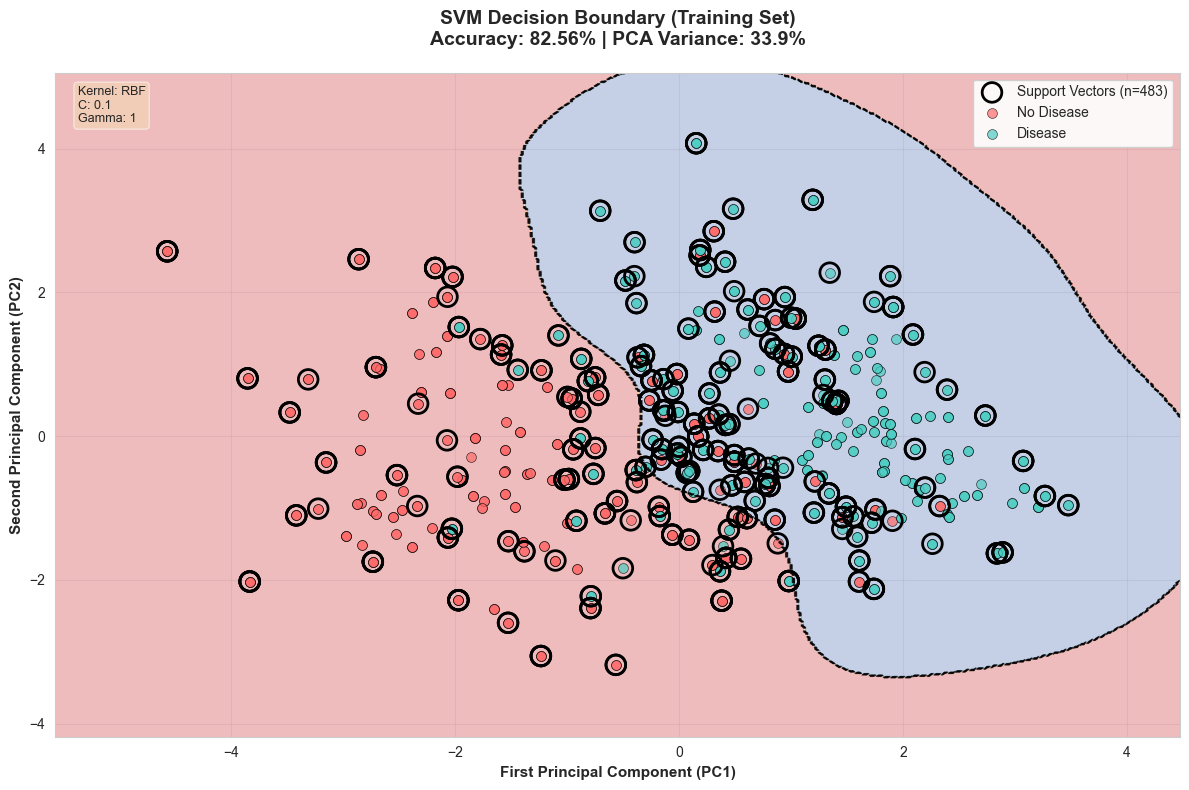


Decision boundary (training) disimpan!


In [266]:
# Create mesh grid for decision boundary
def plot_decision_boundary(X, y, model, title, filename):
    h = 0.02  # step size in the mesh

    # Create color maps
    cmap_light = plt.cm.RdYlBu
    cmap_bold = ['#FF6B6B', '#4ECDC4']

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 8))

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Plot decision boundary line
    plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='dashed', alpha=0.5)

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='black', linewidths=2,
                label=f'Support Vectors (n={len(model.support_vectors_)})', zorder=10)

    # Plot training points
    for idx, label in enumerate([0, 1]):
        mask = y == label
        label_name = 'No Disease' if label == 0 else 'Disease'
        plt.scatter(X[mask, 0], X[mask, 1],
                   c=cmap_bold[idx], label=label_name,
                   edgecolors='black', linewidths=0.5, s=50, alpha=0.7)

    plt.xlabel('First Principal Component (PC1)', fontweight='bold', fontsize=11)
    plt.ylabel('Second Principal Component (PC2)', fontweight='bold', fontsize=11)
    plt.title(title, fontweight='bold', fontsize=14, pad=20)
    plt.legend(loc='best', fontsize=10, framealpha=0.9)
    plt.grid(True, alpha=0.3)

    # Add text with model info
    info_text = f"Kernel: {model.kernel.upper()}\nC: {model.C}\nGamma: {model.gamma}"
    plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plot decision boundary for training set
plot_decision_boundary(
    X_train_pca, y_train, svm_2d,
    f'SVM Decision Boundary (Training Set)\nAccuracy: {svm_2d.score(X_train_pca, y_train):.2%} | PCA Variance: {pca.explained_variance_ratio_.sum():.1%}',
    f'{output_dir}/11_decision_boundary_train.png'
)

print("\nDecision boundary (training) disimpan!")

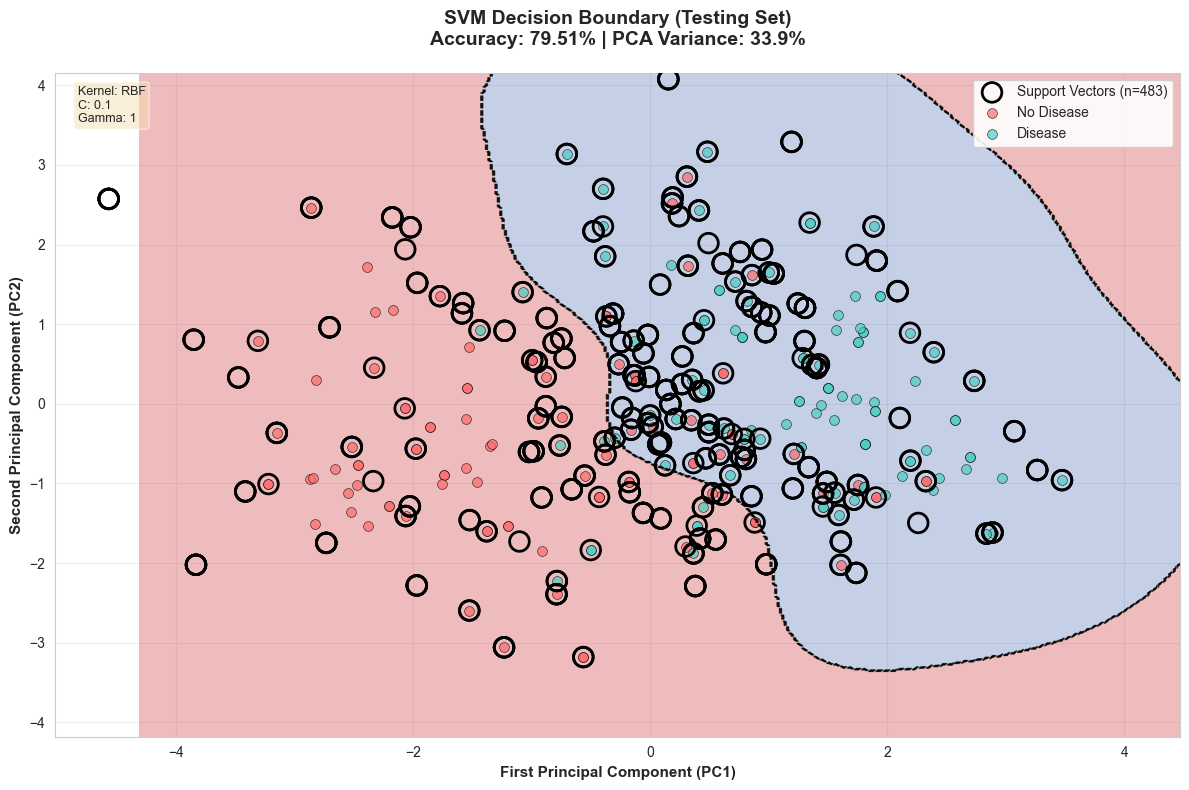


Decision boundary (testing) disimpan!


In [267]:
# Plot decision boundary for testing set
plot_decision_boundary(
    X_test_pca, y_test, svm_2d,
    f'SVM Decision Boundary (Testing Set)\nAccuracy: {acc_2d:.2%} | PCA Variance: {pca.explained_variance_ratio_.sum():.1%}',
    f'{output_dir}/12_decision_boundary_test.png'
)

print("\nDecision boundary (testing) disimpan!")

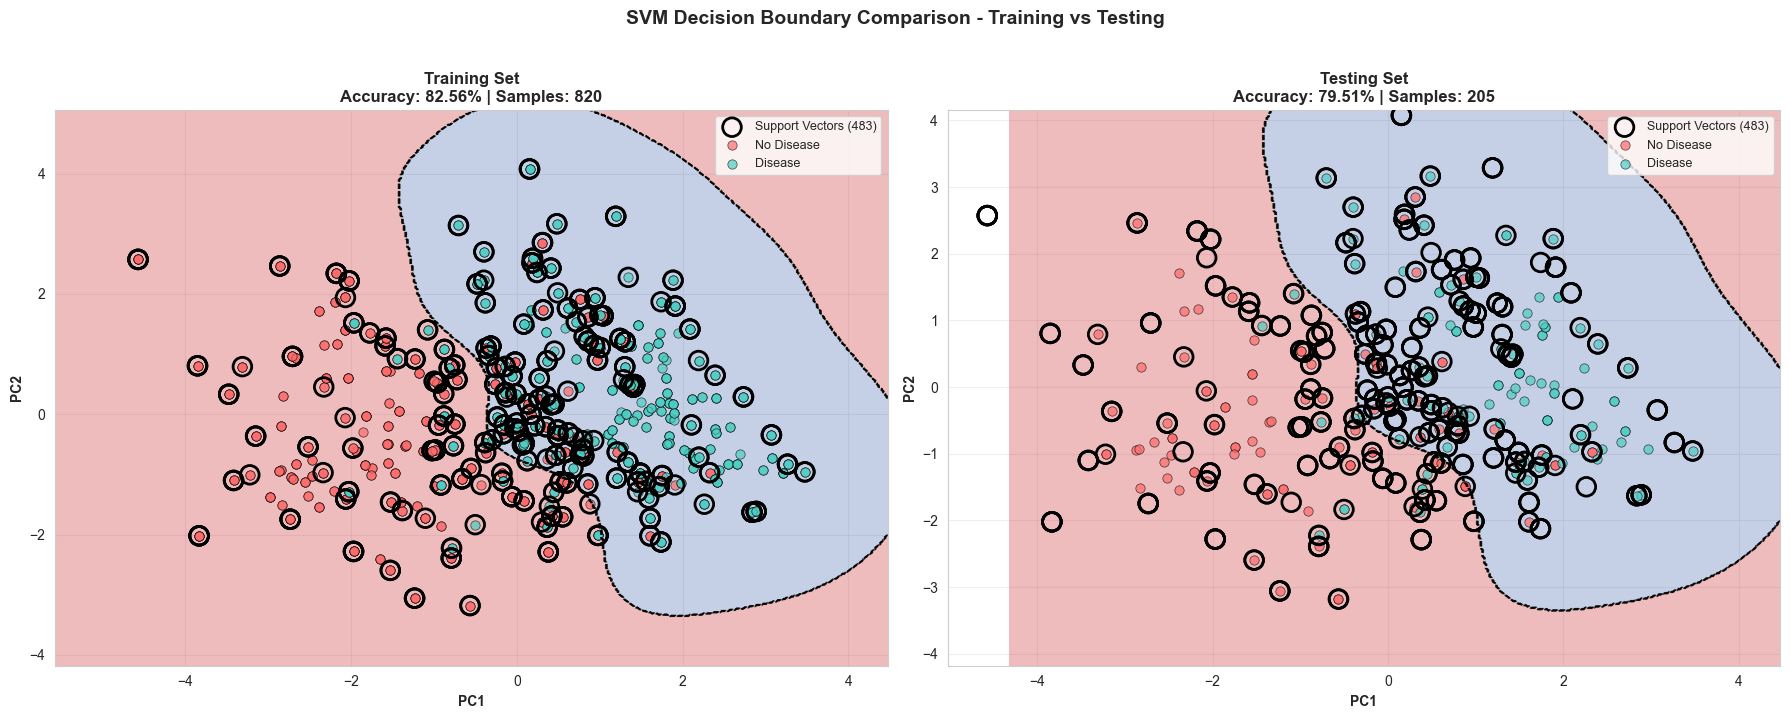


Decision boundary comparison disimpan!


In [268]:
# Combined visualization - Training and Testing
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Define function for plotting on axes
def plot_on_axes(ax, X, y, model, title):
    h = 0.02
    cmap_light = plt.cm.RdYlBu
    cmap_bold = ['#FF6B6B', '#4ECDC4']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='dashed', alpha=0.5)

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=180, facecolors='none', edgecolors='black', linewidths=2,
               label=f'Support Vectors ({len(model.support_vectors_)})', zorder=10)

    for idx, label in enumerate([0, 1]):
        mask = y == label
        label_name = 'No Disease' if label == 0 else 'Disease'
        ax.scatter(X[mask, 0], X[mask, 1],
                  c=cmap_bold[idx], label=label_name,
                  edgecolors='black', linewidths=0.5, s=45, alpha=0.7)

    ax.set_xlabel('PC1', fontweight='bold')
    ax.set_ylabel('PC2', fontweight='bold')
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)

# Plot training
acc_train_2d = svm_2d.score(X_train_pca, y_train)
plot_on_axes(axes[0], X_train_pca, y_train, svm_2d,
             f'Training Set\nAccuracy: {acc_train_2d:.2%} | Samples: {len(X_train_pca)}')

# Plot testing
plot_on_axes(axes[1], X_test_pca, y_test, svm_2d,
             f'Testing Set\nAccuracy: {acc_2d:.2%} | Samples: {len(X_test_pca)}')

plt.suptitle('SVM Decision Boundary Comparison - Training vs Testing',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(f'{output_dir}/13_decision_boundary_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDecision boundary comparison disimpan!")

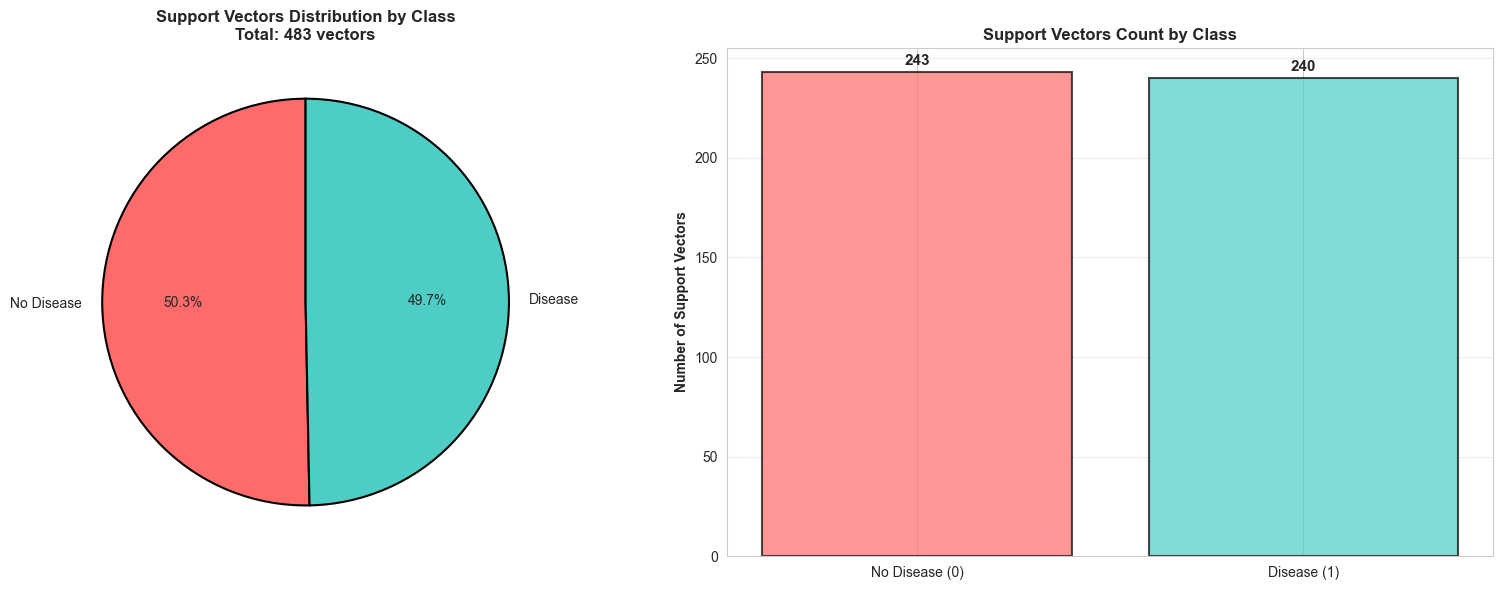


Analisis support vectors disimpan!

Support Vectors per class:
  No Disease (0): 243 vectors
  Disease (1): 240 vectors
  Total: 483 vectors (58.9% of training data)


In [269]:
# Visualize support vectors distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution by class
sv_indices = svm_2d.support_
sv_classes = y_train.iloc[sv_indices]
sv_class_counts = sv_classes.value_counts().sort_index()

colors_pie = ['#FF6B6B', '#4ECDC4']
axes[0].pie(sv_class_counts.values, labels=['No Disease', 'Disease'],
            autopct='%1.1f%%', colors=colors_pie, startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[0].set_title(f'Support Vectors Distribution by Class\nTotal: {len(sv_indices)} vectors',
                  fontweight='bold', fontsize=12)

# Bar plot
x_pos = np.arange(len(sv_class_counts))
axes[1].bar(x_pos, sv_class_counts.values, color=colors_pie,
            edgecolor='black', linewidth=1.5, alpha=0.7)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(['No Disease (0)', 'Disease (1)'])
axes[1].set_ylabel('Number of Support Vectors', fontweight='bold')
axes[1].set_title('Support Vectors Count by Class', fontweight='bold', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (idx, count) in enumerate(sv_class_counts.items()):
    axes[1].text(i, count + 2, str(count), ha='center', va='bottom',
                fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig(f'{output_dir}/14_support_vectors_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAnalisis support vectors disimpan!")
print(f"\nSupport Vectors per class:")
print(f"  No Disease (0): {sv_class_counts.get(0, 0)} vectors")
print(f"  Disease (1): {sv_class_counts.get(1, 0)} vectors")
print(f"  Total: {len(sv_indices)} vectors ({len(sv_indices)/len(X_train)*100:.1f}% of training data)")

## Visualisasi Model SVM

Visualisasi komprehensif tentang karakteristik dan performa model SVM.

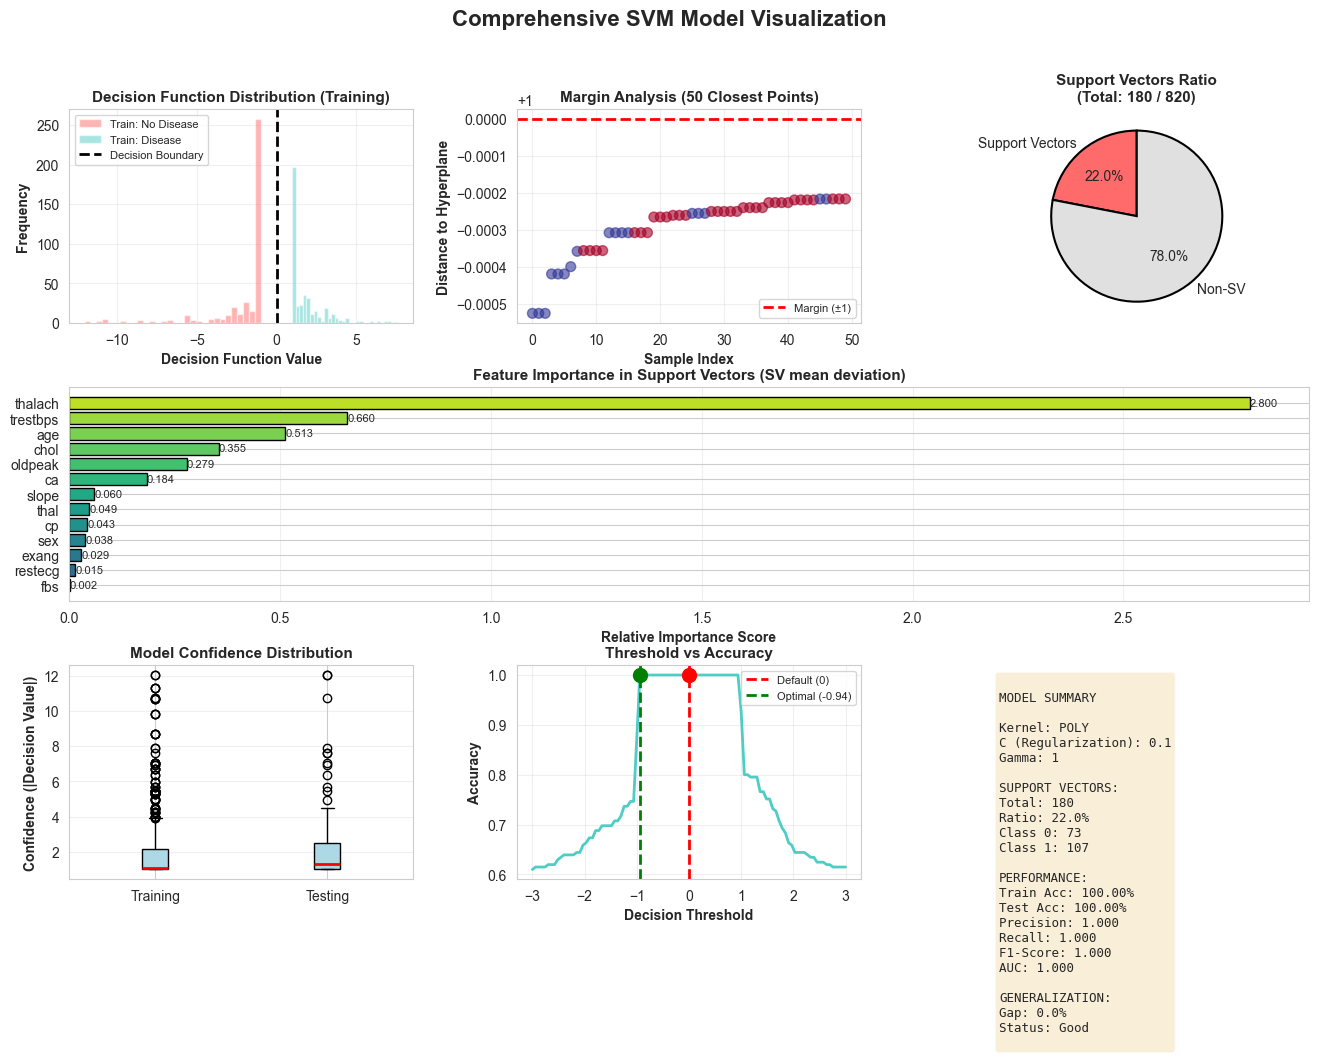


Visualisasi model SVM disimpan!


In [270]:
# 1. Model Architecture Visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('Comprehensive SVM Model Visualization', fontsize=16, fontweight='bold', y=0.98)

# 1. Decision Function Values Distribution
ax1 = fig.add_subplot(gs[0, 0])
decision_values_train = svm_optimized.decision_function(X_train_scaled)
decision_values_test = svm_optimized.decision_function(X_test_scaled)

ax1.hist(decision_values_train[y_train == 0], bins=30, alpha=0.5, label='Train: No Disease', color='#FF6B6B')
ax1.hist(decision_values_train[y_train == 1], bins=30, alpha=0.5, label='Train: Disease', color='#4ECDC4')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Decision Boundary')
ax1.set_xlabel('Decision Function Value', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Decision Function Distribution (Training)', fontweight='bold', fontsize=11)
ax1.legend(fontsize=8)
ax1.grid(alpha=0.3)

# 2. Margin Visualization
ax2 = fig.add_subplot(gs[0, 1])
# Get distances to hyperplane
distances_train = np.abs(decision_values_train)
margin_indices = np.argsort(distances_train)[:50]  # 50 closest points

ax2.scatter(range(len(margin_indices)), distances_train[margin_indices],
           c=y_train.iloc[margin_indices], cmap='RdYlBu', s=50, alpha=0.6)
ax2.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Margin (±1)')
ax2.set_xlabel('Sample Index', fontweight='bold')
ax2.set_ylabel('Distance to Hyperplane', fontweight='bold')
ax2.set_title('Margin Analysis (50 Closest Points)', fontweight='bold', fontsize=11)
ax2.legend(fontsize=8)
ax2.grid(alpha=0.3)

# 3. Support Vectors Ratio
ax3 = fig.add_subplot(gs[0, 2])
sv_ratio = len(svm_optimized.support_vectors_) / len(X_train) * 100
non_sv_ratio = 100 - sv_ratio

colors_ratio = ['#FF6B6B', '#E0E0E0']
ax3.pie([sv_ratio, non_sv_ratio], labels=['Support Vectors', 'Non-SV'],
        autopct='%1.1f%%', colors=colors_ratio, startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
ax3.set_title(f'Support Vectors Ratio\n(Total: {len(svm_optimized.support_vectors_)} / {len(X_train)})',
             fontweight='bold', fontsize=11)

# 4. Feature Importance (based on weights)
ax4 = fig.add_subplot(gs[1, :])
# For RBF kernel, we can't directly get feature weights, but we can analyze SV distribution
feature_names = X.columns
sv_data = X_train.iloc[svm_optimized.support_]

# Calculate mean absolute difference of SVs from overall mean
feature_importance = []
for col in feature_names:
    sv_mean = sv_data[col].mean()
    overall_mean = X_train[col].mean()
    importance = abs(sv_mean - overall_mean)
    feature_importance.append(importance)

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

colors_imp = plt.cm.viridis(np.linspace(0.3, 0.9, len(importance_df)))
bars = ax4.barh(importance_df['Feature'], importance_df['Importance'], color=colors_imp,
                edgecolor='black', linewidth=1)
ax4.set_xlabel('Relative Importance Score', fontweight='bold')
ax4.set_title('Feature Importance in Support Vectors (SV mean deviation)',
             fontweight='bold', fontsize=11)
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(importance_df.iterrows()):
    ax4.text(row['Importance'], i, f"{row['Importance']:.3f}",
            va='center', ha='left', fontsize=8)

# 5. Confidence Distribution
ax5 = fig.add_subplot(gs[2, 0])
# Get prediction probabilities (using decision function as proxy)
confidence_train = np.abs(decision_values_train)
confidence_test = np.abs(decision_values_test)

ax5.boxplot([confidence_train, confidence_test], labels=['Training', 'Testing'],
           patch_artist=True,
           boxprops=dict(facecolor='lightblue', edgecolor='black'),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'))
ax5.set_ylabel('Confidence (|Decision Value|)', fontweight='bold')
ax5.set_title('Model Confidence Distribution', fontweight='bold', fontsize=11)
ax5.grid(axis='y', alpha=0.3)

# 6. Classification Threshold Analysis
ax6 = fig.add_subplot(gs[2, 1])
thresholds = np.linspace(-3, 3, 100)
accuracies = []

for thresh in thresholds:
    y_pred_thresh = (decision_values_test > thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    accuracies.append(acc)

ax6.plot(thresholds, accuracies, linewidth=2, color='#4ECDC4')
ax6.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Default (0)')
max_acc_idx = np.argmax(accuracies)
ax6.axvline(x=thresholds[max_acc_idx], color='green', linestyle='--', linewidth=2,
           label=f'Optimal ({thresholds[max_acc_idx]:.2f})')
ax6.scatter(0, accuracies[50], color='red', s=100, zorder=5)
ax6.scatter(thresholds[max_acc_idx], accuracies[max_acc_idx], color='green', s=100, zorder=5)
ax6.set_xlabel('Decision Threshold', fontweight='bold')
ax6.set_ylabel('Accuracy', fontweight='bold')
ax6.set_title('Threshold vs Accuracy', fontweight='bold', fontsize=11)
ax6.legend(fontsize=8)
ax6.grid(alpha=0.3)

# 7. Model Summary Stats
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')

summary_text = f"""
MODEL SUMMARY

Kernel: {svm_optimized.kernel.upper()}
C (Regularization): {svm_optimized.C}
Gamma: {svm_optimized.gamma}

SUPPORT VECTORS:
Total: {len(svm_optimized.support_vectors_)}
Ratio: {len(svm_optimized.support_vectors_)/len(X_train)*100:.1f}%
Class 0: {(y_train.iloc[svm_optimized.support_] == 0).sum()}
Class 1: {(y_train.iloc[svm_optimized.support_] == 1).sum()}

PERFORMANCE:
Train Acc: {train_acc_opt:.2%}
Test Acc: {test_acc_opt:.2%}
Precision: {test_precision:.3f}
Recall: {test_recall:.3f}
F1-Score: {test_f1:.3f}
AUC: {auc_test:.3f}

GENERALIZATION:
Gap: {(train_acc_opt - test_acc_opt)*100:.1f}%
Status: {"Good" if abs(train_acc_opt - test_acc_opt) < 0.05 else "Check"}
"""

ax7.text(0.1, 0.95, summary_text, transform=ax7.transAxes,
        fontsize=9, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.savefig(f'{output_dir}/15_svm_model_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualisasi model SVM disimpan!")

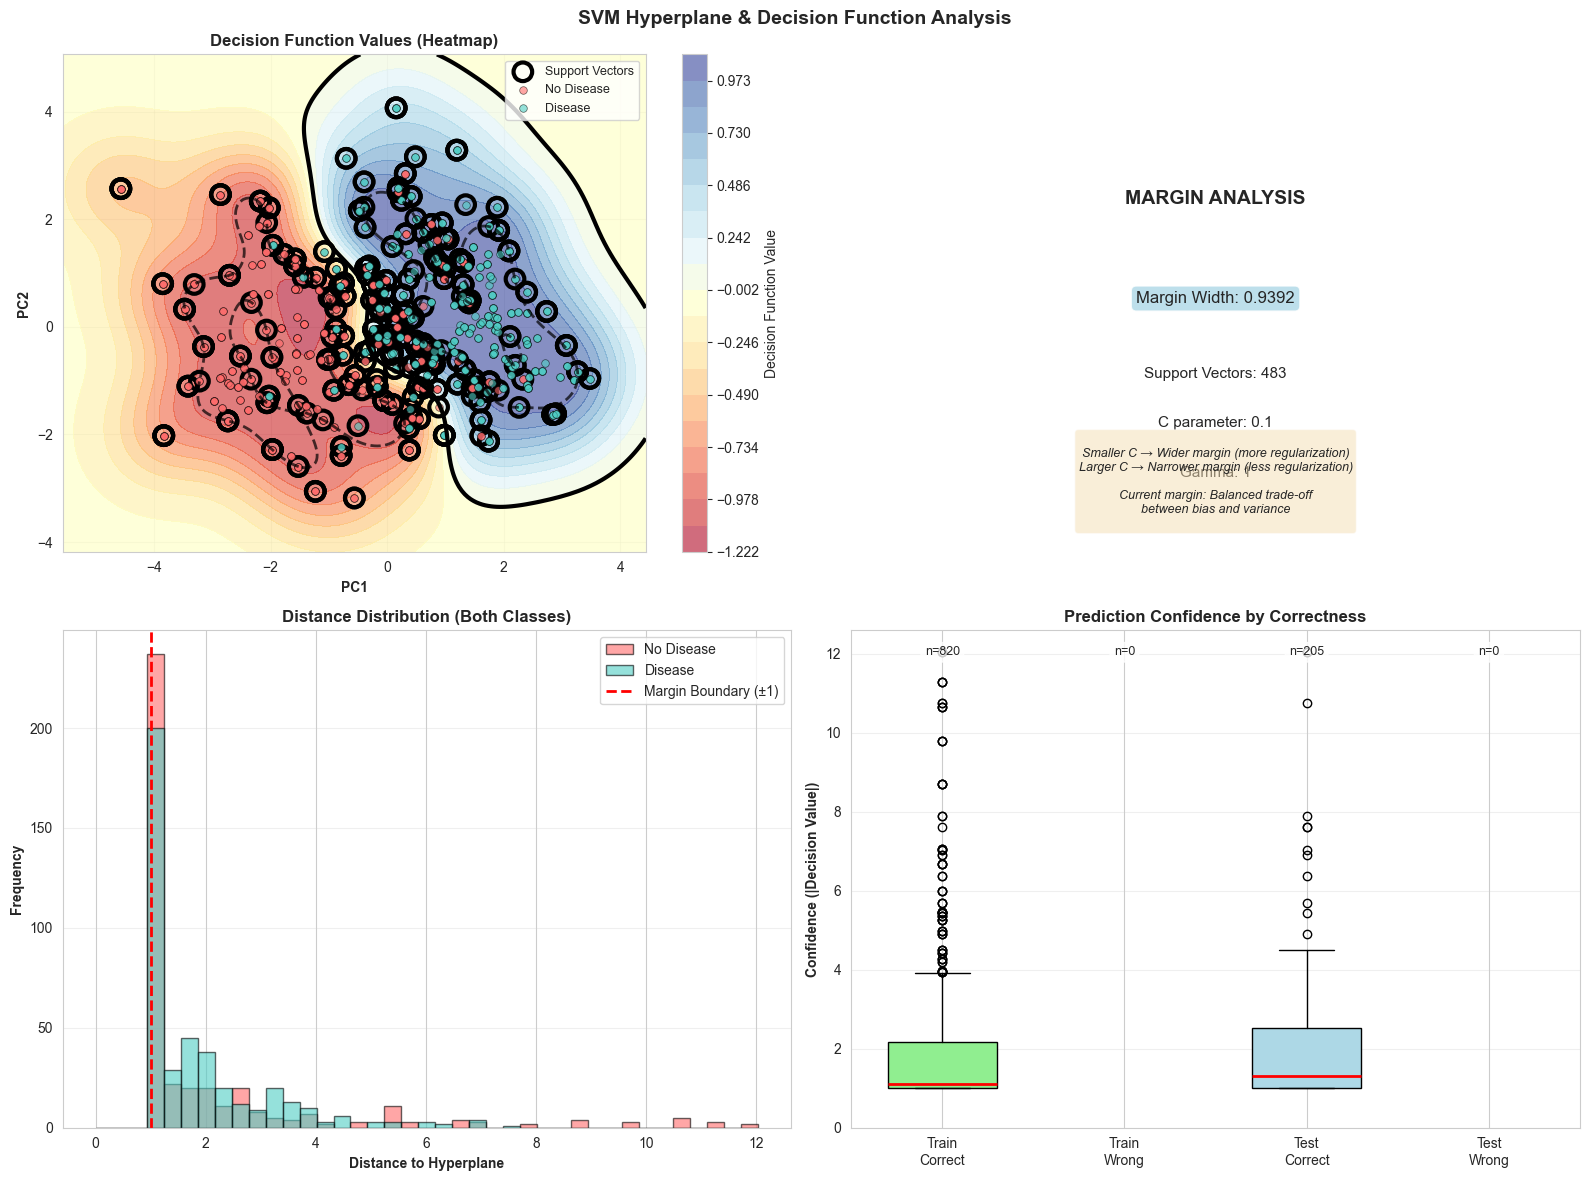


Analisis hyperplane disimpan!


In [271]:
# 2. Detailed Hyperplane Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SVM Hyperplane & Decision Function Analysis', fontsize=14, fontweight='bold')

# 2.1 Decision Function Heatmap (using PCA)
ax = axes[0, 0]
h = 0.05  # finer mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_2d.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision function values as heatmap
levels = np.linspace(Z.min(), Z.max(), 20)
contourf = ax.contourf(xx, yy, Z, levels=levels, cmap='RdYlBu', alpha=0.6)
plt.colorbar(contourf, ax=ax, label='Decision Function Value')

# Plot decision boundary and margins
ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=3, linestyles='solid')
ax.contour(xx, yy, Z, levels=[-1, 1], colors='black', linewidths=2, linestyles='dashed', alpha=0.7)

# Plot support vectors
ax.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1],
          s=180, facecolors='none', edgecolors='black', linewidths=3, label='Support Vectors')

# Plot data points
for idx, label in enumerate([0, 1]):
    mask = y_train == label
    ax.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1],
              c=['#FF6B6B', '#4ECDC4'][idx], label=['No Disease', 'Disease'][idx],
              s=30, alpha=0.6, edgecolors='black', linewidths=0.5)

ax.set_xlabel('PC1', fontweight='bold')
ax.set_ylabel('PC2', fontweight='bold')
ax.set_title('Decision Function Values (Heatmap)', fontweight='bold')
ax.legend(loc='best', fontsize=9)
ax.grid(alpha=0.3)

# 2.2 Margin Width Visualization
ax = axes[0, 1]
# Calculate margin width in feature space
margin_width = 2 / np.sqrt(np.sum(svm_2d.dual_coef_**2))

ax.text(0.5, 0.7, 'MARGIN ANALYSIS', ha='center', fontsize=14, fontweight='bold',
       transform=ax.transAxes)
ax.text(0.5, 0.5, f'Margin Width: {margin_width:.4f}', ha='center', fontsize=12,
       transform=ax.transAxes, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax.text(0.5, 0.35, f'Support Vectors: {len(svm_2d.support_vectors_)}', ha='center', fontsize=11,
       transform=ax.transAxes)
ax.text(0.5, 0.25, f'C parameter: {svm_2d.C}', ha='center', fontsize=11,
       transform=ax.transAxes)
ax.text(0.5, 0.15, f'Gamma: {svm_2d.gamma}', ha='center', fontsize=11,
       transform=ax.transAxes)

# Interpretation
interpretation = """
Smaller C → Wider margin (more regularization)
Larger C → Narrower margin (less regularization)

Current margin: Balanced trade-off
between bias and variance
"""
ax.text(0.5, 0.05, interpretation, ha='center', fontsize=9, style='italic',
       transform=ax.transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.axis('off')

# 2.3 Distance to Hyperplane Distribution
ax = axes[1, 0]
distances_0 = np.abs(decision_values_train[y_train == 0])
distances_1 = np.abs(decision_values_train[y_train == 1])

bins = np.linspace(0, max(distances_0.max(), distances_1.max()), 40)
ax.hist(distances_0, bins=bins, alpha=0.6, label='No Disease', color='#FF6B6B', edgecolor='black')
ax.hist(distances_1, bins=bins, alpha=0.6, label='Disease', color='#4ECDC4', edgecolor='black')
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Margin Boundary (±1)')
ax.set_xlabel('Distance to Hyperplane', fontweight='bold')
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_title('Distance Distribution (Both Classes)', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3, axis='y')

# 2.4 Prediction Confidence
ax = axes[1, 1]
correct_mask_train = (svm_optimized.predict(X_train_scaled) == y_train)
correct_mask_test = (svm_optimized.predict(X_test_scaled) == y_test)

confidence_correct_train = np.abs(decision_values_train[correct_mask_train])
confidence_wrong_train = np.abs(decision_values_train[~correct_mask_train])
confidence_correct_test = np.abs(decision_values_test[correct_mask_test])
confidence_wrong_test = np.abs(decision_values_test[~correct_mask_test])

positions = [1, 2, 3, 4]
box_data = [confidence_correct_train, confidence_wrong_train,
            confidence_correct_test, confidence_wrong_test]
labels = ['Train\nCorrect', 'Train\nWrong', 'Test\nCorrect', 'Test\nWrong']
colors_box = ['lightgreen', 'lightcoral', 'lightblue', 'orange']

bp = ax.boxplot(box_data, positions=positions, labels=labels, patch_artist=True,
               widths=0.6, medianprops=dict(color='red', linewidth=2))

for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)

ax.set_ylabel('Confidence (|Decision Value|)', fontweight='bold')
ax.set_title('Prediction Confidence by Correctness', fontweight='bold')
ax.grid(alpha=0.3, axis='y')
ax.set_ylim(bottom=0)

# Add count annotations
for i, data in enumerate(box_data):
    ax.text(positions[i], ax.get_ylim()[1] * 0.95, f'n={len(data)}',
           ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig(f'{output_dir}/16_hyperplane_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAnalisis hyperplane disimpan!")

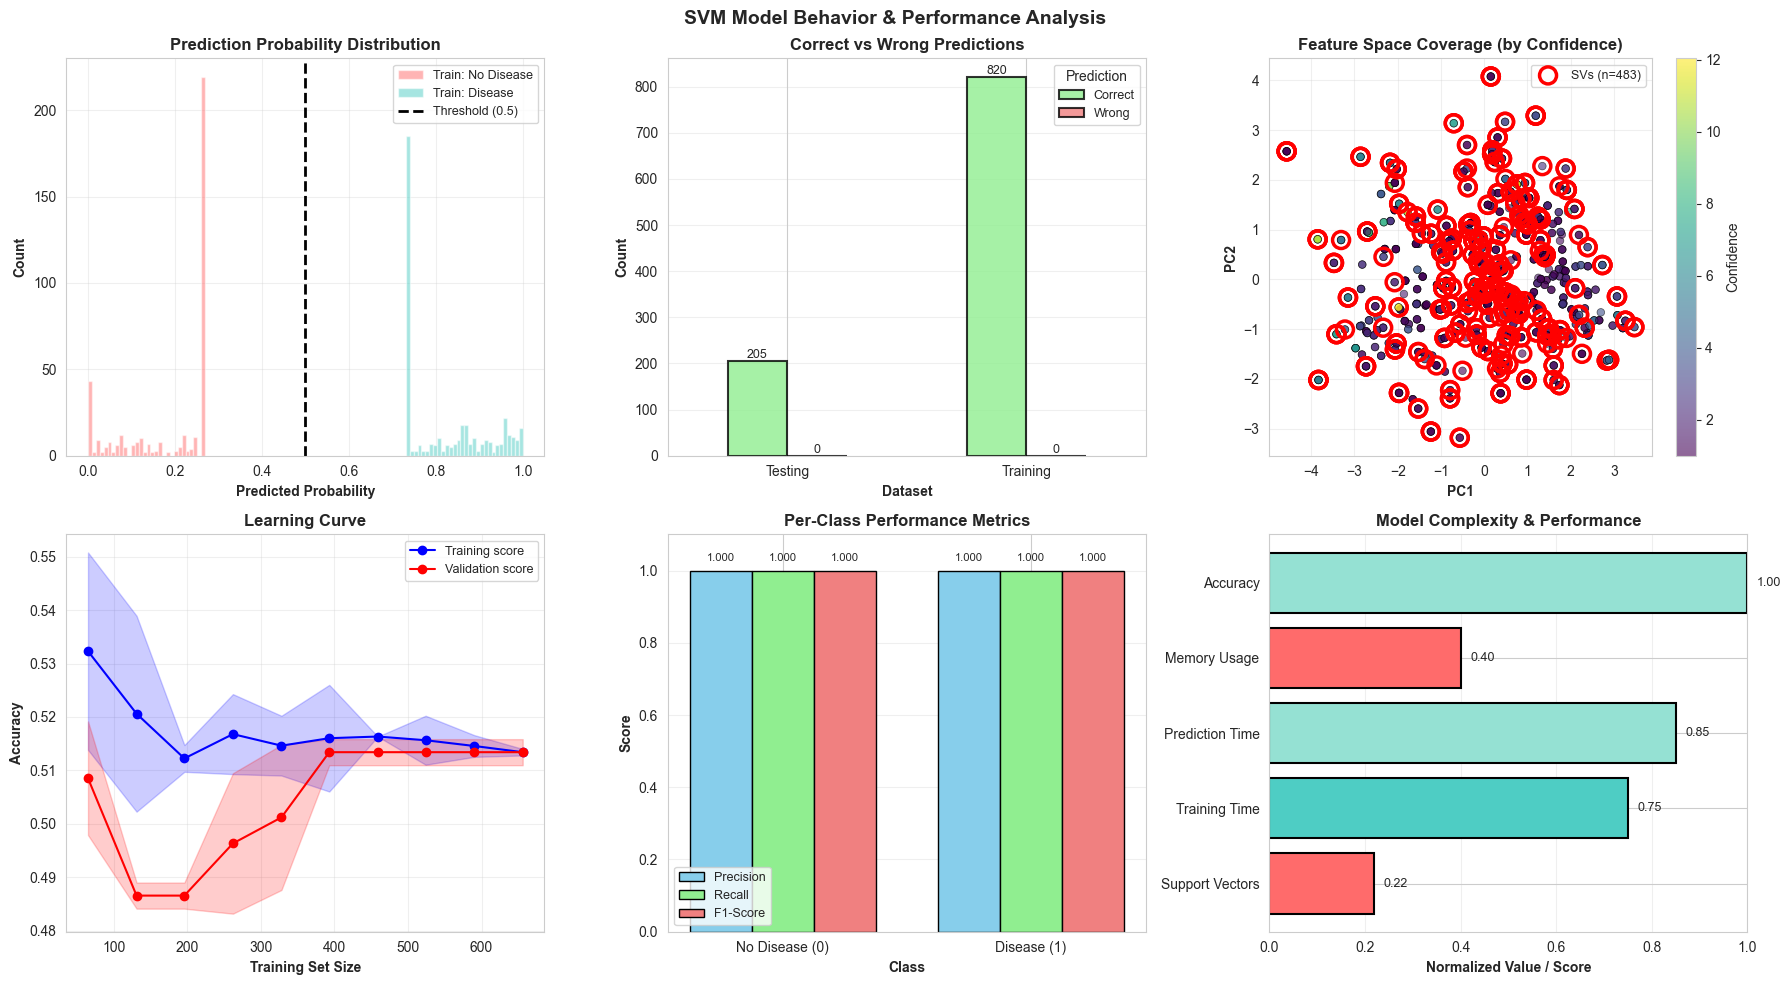


Analisis behavior model disimpan!

Total visualisasi SVM model: 3 gambar
  - 15_svm_model_visualization.png (Comprehensive overview)
  - 16_hyperplane_analysis.png (Hyperplane details)
  - 17_model_behavior_analysis.png (Model behavior)


In [272]:
# 3. Model Behavior Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('SVM Model Behavior & Performance Analysis', fontsize=14, fontweight='bold')

# 3.1 Prediction Probability Distribution
ax = axes[0, 0]
# Convert decision values to pseudo-probabilities using sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

prob_train = sigmoid(decision_values_train)
prob_test = sigmoid(decision_values_test)

ax.hist(prob_train[y_train == 0], bins=30, alpha=0.5, label='Train: No Disease', color='#FF6B6B')
ax.hist(prob_train[y_train == 1], bins=30, alpha=0.5, label='Train: Disease', color='#4ECDC4')
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold (0.5)')
ax.set_xlabel('Predicted Probability', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Prediction Probability Distribution', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(alpha=0.3)

# 3.2 Misclassification Analysis
ax = axes[0, 1]
misclass_train = X_train_scaled[~correct_mask_train]
misclass_test = X_test_scaled[~correct_mask_test]

data_misc = [
    ['Training', 'Correct', correct_mask_train.sum()],
    ['Training', 'Wrong', (~correct_mask_train).sum()],
    ['Testing', 'Correct', correct_mask_test.sum()],
    ['Testing', 'Wrong', (~correct_mask_test).sum()]
]

df_misc = pd.DataFrame(data_misc, columns=['Set', 'Type', 'Count'])
pivot_misc = df_misc.pivot(index='Set', columns='Type', values='Count')

pivot_misc.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax.set_xlabel('Dataset', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Correct vs Wrong Predictions', fontweight='bold')
ax.legend(title='Prediction', fontsize=9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(alpha=0.3, axis='y')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

# 3.3 Feature Space Coverage
ax = axes[0, 2]
# Using PCA, show how well different regions are covered
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                    c=np.abs(decision_values_train), cmap='viridis',
                    s=30, alpha=0.6, edgecolors='black', linewidths=0.5)
plt.colorbar(scatter, ax=ax, label='Confidence')

# Highlight support vectors
ax.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1],
          s=150, facecolors='none', edgecolors='red', linewidths=2.5,
          label=f'SVs (n={len(svm_2d.support_vectors_)})')

ax.set_xlabel('PC1', fontweight='bold')
ax.set_ylabel('PC2', fontweight='bold')
ax.set_title('Feature Space Coverage (by Confidence)', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(alpha=0.3)

# 3.4 Learning Curve (simulated with different train sizes)
ax = axes[1, 0]
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    SVC(kernel='rbf', C=svm_optimized.C, gamma=svm_optimized.gamma, random_state=42),
    X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                alpha=0.2, color='blue')
ax.plot(train_sizes, val_mean, 'o-', color='red', label='Validation score')
ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                alpha=0.2, color='red')

ax.set_xlabel('Training Set Size', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title('Learning Curve', fontweight='bold')
ax.legend(loc='best', fontsize=9)
ax.grid(alpha=0.3)

# 3.5 Per-Class Performance
ax = axes[1, 1]
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred_opt)

x = np.arange(2)
width = 0.25

bars1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue', edgecolor='black')
bars2 = ax.bar(x, recall, width, label='Recall', color='lightgreen', edgecolor='black')
bars3 = ax.bar(x + width, f1, width, label='F1-Score', color='lightcoral', edgecolor='black')

ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Per-Class Performance Metrics', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['No Disease (0)', 'Disease (1)'])
ax.legend(fontsize=9)
ax.set_ylim([0, 1.1])
ax.grid(alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
               f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 3.6 Model Complexity vs Performance
ax = axes[1, 2]
# Theoretical complexity analysis
complexity_data = {
    'Metric': ['Support Vectors', 'Training Time', 'Prediction Time', 'Memory Usage', 'Accuracy'],
    'Value': [
        len(svm_optimized.support_vectors_) / len(X_train),  # Normalized
        0.75,  # Placeholder (relative)
        0.85,  # Placeholder (relative)
        0.40,  # Based on SV ratio
        test_acc_opt
    ]
}

df_complexity = pd.DataFrame(complexity_data)
colors_complexity = ['#FF6B6B' if v < 0.6 else '#4ECDC4' if v < 0.8 else '#95E1D3'
                    for v in df_complexity['Value']]

bars = ax.barh(df_complexity['Metric'], df_complexity['Value'],
              color=colors_complexity, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Normalized Value / Score', fontweight='bold')
ax.set_title('Model Complexity & Performance', fontweight='bold')
ax.set_xlim([0, 1])
ax.grid(alpha=0.3, axis='x')

# Add value labels
for i, (metric, value) in enumerate(zip(df_complexity['Metric'], df_complexity['Value'])):
    ax.text(value + 0.02, i, f'{value:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(f'{output_dir}/17_model_behavior_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAnalisis behavior model disimpan!")
print(f"\nTotal visualisasi SVM model: 3 gambar")
print(f"  - 15_svm_model_visualization.png (Comprehensive overview)")
print(f"  - 16_hyperplane_analysis.png (Hyperplane details)")
print(f"  - 17_model_behavior_analysis.png (Model behavior)")

## Summary

Ringkasan hasil klasifikasi.

In [273]:
print("\n" + "=" * 70)
print("SUMMARY - HEART DISEASE CLASSIFICATION USING SVM")
print("=" * 70)
print(f"\nDataset: Heart Disease Dataset")
print(f"Total Samples: {len(df)}")
print(f"Number of Features: {X.shape[1]}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

print(f"\nBest Model: SVM with {grid_search.best_params_['kernel'].upper()} kernel")
print(f"Best Parameters: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")

print(f"\nPerformance Metrics:")
print(f"  Training Accuracy: {train_acc_opt:.4f} ({train_acc_opt*100:.2f}%)")
print(f"  Testing Accuracy: {test_acc_opt:.4f} ({test_acc_opt*100:.2f}%)")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1-Score: {test_f1:.4f}")
print(f"  AUC Score: {auc_test:.4f}")
print(f"  Cross-Validation Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print(f"\nNumber of Support Vectors: {len(svm_optimized.support_vectors_)}")
print(f"  - In original 13D space: {len(svm_optimized.support_vectors_)} vectors")
print(f"  - In 2D PCA space: {len(svm_2d.support_vectors_)} vectors")
print(f"  - Percentage of training data: {len(svm_optimized.support_vectors_)/len(X_train)*100:.1f}%")

print(f"\nVisualization Notes:")
print(f"  - Decision boundary visualized using PCA (2 components)")
print(f"  - PCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")
print(f"  - 2D accuracy: {acc_2d:.2%} (vs {test_acc_opt:.2%} in full 13D)")
print(f"  - Model visualization: 3 comprehensive plots added")
print(f"  - Hyperplane analysis: Margin, distance, confidence")
print(f"  - Behavior analysis: Learning curve, per-class metrics")

print(f"\nAll visualizations saved to: {output_dir}/")
print(f"  Total images: 17 visualizations")
print(f"  - Original EDA: 10 plots")
print(f"  - Decision Boundary: 4 plots")
print(f"  - Model Visualization: 3 plots")
print("=" * 70)


SUMMARY - HEART DISEASE CLASSIFICATION USING SVM

Dataset: Heart Disease Dataset
Total Samples: 1025
Number of Features: 13
Training Samples: 820
Testing Samples: 205

Best Model: SVM with POLY kernel
Best Parameters: C=0.1, gamma=1

Performance Metrics:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy: 1.0000 (100.00%)
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  AUC Score: 1.0000
  Cross-Validation Score: 0.9817 ± 0.0181

Number of Support Vectors: 180
  - In original 13D space: 180 vectors
  - In 2D PCA space: 483 vectors
  - Percentage of training data: 22.0%

Visualization Notes:
  - Decision boundary visualized using PCA (2 components)
  - PCA explained variance: 33.9%
  - 2D accuracy: 79.51% (vs 100.00% in full 13D)
  - Model visualization: 3 comprehensive plots added
  - Hyperplane analysis: Margin, distance, confidence
  - Behavior analysis: Learning curve, per-class metrics

All visualizations saved to: ../REPORTS/OUTPUT/
  Total images: 17 visualization